In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

from Tool_v1 import *


# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
yf.pdr_override()

In [2]:
from itertools import combinations
c = (1,2,3,4,5,6,7,8,9,10,11,12) 
i=0
result=[]
while i<len(c):
    for j in combinations(c,i):
        #print(list(j))
        result.append(list(j))
    i+=1 
print(len(result))

4095


In [3]:
start="2020-12-31"
end="2023-09-30"
name="AAPL"


#MACD619RSI21_8020
stock_data=pct_change(name,start,end)

stock_data=stock_data.copy()

stock_data=MACD_short(stock_data)
stock_data=RSI(stock_data)
stock_data=RSI_MACD(stock_data,21,80,20)


stock_data= my_rsi(stock_data, 21)



del stock_data["real_situation"]

#del stock_data["Close_price_percentage"]

stock_data = stock_data.dropna()


print(stock_data)

y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)






                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-02-03  135.759995  135.770004  133.610001  133.940002  131.788925   
2021-02-04  136.300003  137.399994  134.589996  137.389999  135.183533   
2021-02-05  137.350006  137.419998  135.860001  136.759995  134.764709   
2021-02-08  136.029999  136.960007  134.919998  136.910004  134.912521   
2021-02-09  136.619995  137.880005  135.850006  136.009995  134.025681   
...                ...         ...         ...         ...         ...   
2023-09-25  174.199997  176.970001  174.149994  176.080002  176.080002   
2023-09-26  174.820007  175.199997  171.660004  171.960007  171.960007   
2023-09-27  172.619995  173.039993  169.050003  170.429993  170.429993   
2023-09-28  169.339996  172.029999  167.619995  170.690002  170.690002   
2023-09-29  172.020004  173.070007  170.339996  171.210007  171.210007   

              Volume  Close_price_per

In [14]:
#stock_data = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21", "up_or_down"]]
stock_data.head()

print(stock_data.iloc[:, 5].to_frame())

              Volume
Date                
2021-02-03  89880900
2021-02-04  84183100
2021-02-05  75693800
2021-02-08  71297200
2021-02-09  76774200
...              ...
2023-09-25  46172700
2023-09-26  64588900
2023-09-27  66921800
2023-09-28  56294400
2023-09-29  51814200

[669 rows x 1 columns]


21


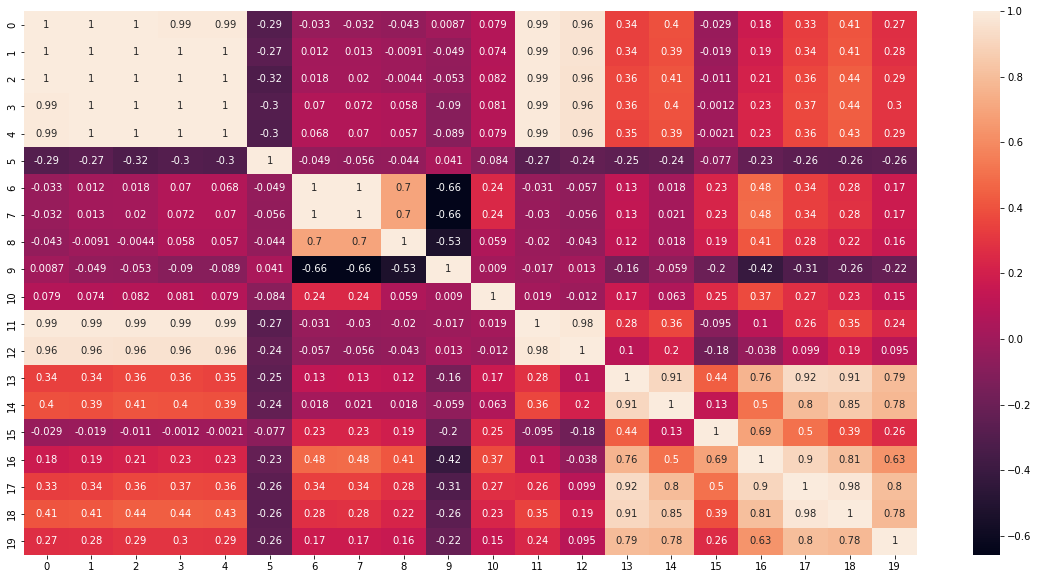

In [5]:
num_columns = stock_data.shape[1]+1
print(num_columns)
cor = np.corrcoef(stock_data.T)
plt.figure(figsize=(20, 10))
sns.heatmap(cor, annot=True)
plt.show()

In [6]:
for i in range(1,num_columns):
    #standardScaler
    X = stock_data.iloc[:,:i]
    st_x= StandardScaler()  
    X= st_x.fit_transform(X)  
    
    #split dataset
    split = int(0.7*len(stock_data))
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
    # 设置正则化类型（L1, L2, Elastic Net）
    penalty = 'l2' 

    # 设置正则化强度（C）
    C = 0.005

    #logistic regression
    model = LogisticRegression(penalty =penalty, C=C) 
    #logistic regression
    #model = LogisticRegression(max_iter=20000)
    model = model.fit (X_train,y_train)
    probability = model.predict_proba(X_test)
    predicted = model.predict(X_test)
    
    #result
    #print(metrics.classification_report(y_test, predicted))
    #print(metrics.confusion_matrix(y_test, predicted)) 
    print(i,": ","model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

1 :  model_score:  0.5074626865671642  f1_score:  0.40718562874251496  accuary_score:  0.5074626865671642
2 :  model_score:  0.5323383084577115  f1_score:  0.4050632911392405  accuary_score:  0.5323383084577115
3 :  model_score:  0.5174129353233831  f1_score:  0.3821656050955414  accuary_score:  0.5174129353233831
4 :  model_score:  0.5223880597014925  f1_score:  0.3846153846153846  accuary_score:  0.5223880597014925
5 :  model_score:  0.5223880597014925  f1_score:  0.3846153846153846  accuary_score:  0.5223880597014925
6 :  model_score:  0.5124378109452736  f1_score:  0.36363636363636365  accuary_score:  0.5124378109452736
7 :  model_score:  0.5124378109452736  f1_score:  0.3466666666666667  accuary_score:  0.5124378109452736
8 :  model_score:  0.5024875621890548  f1_score:  0.34210526315789475  accuary_score:  0.5024875621890548
9 :  model_score:  0.5074626865671642  f1_score:  0.34437086092715236  accuary_score:  0.5074626865671642
10 :  model_score:  0.5074626865671642  f1_score:  

In [7]:


for i in range(1,num_columns):
    #normalization MinMaxScalar
    X = stock_data.iloc[:,:i]
    st_x= MinMaxScaler()   
    X= st_x.fit_transform(X)  
    
    
    #split dataset
    split = int(0.7*len(stock_data))
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
    #logistic regression
    model = LogisticRegression(max_iter=20000)
    model = model.fit (X_train,y_train)
    probability = model.predict_proba(X_test)
    predicted = model.predict(X_test)
    #result
    #print(metrics.classification_report(y_test, predicted))
    #print(metrics.confusion_matrix(y_test, predicted)) 
    print(i,": ","model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

1 :  model_score:  0.5174129353233831  f1_score:  0.3821656050955414  accuary_score:  0.5174129353233831
2 :  model_score:  0.5223880597014925  f1_score:  0.3846153846153846  accuary_score:  0.5223880597014925
3 :  model_score:  0.5223880597014925  f1_score:  0.3846153846153846  accuary_score:  0.5223880597014925
4 :  model_score:  0.5223880597014925  f1_score:  0.3846153846153846  accuary_score:  0.5223880597014925
5 :  model_score:  0.5174129353233831  f1_score:  0.37419354838709684  accuary_score:  0.5174129353233831
6 :  model_score:  0.5024875621890548  f1_score:  0.33333333333333337  accuary_score:  0.5024875621890548
7 :  model_score:  0.5074626865671642  f1_score:  0.33557046979865773  accuary_score:  0.5074626865671642
8 :  model_score:  0.5124378109452736  f1_score:  0.3466666666666667  accuary_score:  0.5124378109452736
9 :  model_score:  0.5223880597014925  f1_score:  0.36  accuary_score:  0.5223880597014925
10 :  model_score:  0.46766169154228854  f1_score:  0.291390728476

In [8]:
#standardScaler
X = stock_data.iloc[:,:num_columns]
st_x= StandardScaler()  
X= st_x.fit_transform(X)  
    
#PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
#logistic regression
model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)
probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

model_score:  0.5024875621890548  f1_score:  0.31506849315068497  accuary_score:  0.5024875621890548


In [9]:
#normalization MinMaxScalar
X = stock_data.iloc[:,:num_columns]
st_x= MinMaxScaler()   
X= st_x.fit_transform(X)  
    
#PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#logistic regression
model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)
probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

model_score:  0.5074626865671642  f1_score:  0.326530612244898  accuary_score:  0.5074626865671642
